# I - Introduction

*Hacktiv8 - Full Time Data Science Remote Batch 16*

*Final Project Group 3*

- Huesca Rashad
- Monica Pratiwi
- Muhammad Irfan Hilman
- Rivaldo Jasper
- St Syakirah
- Venu Fitratama
- Wenny Sari

The banking sector is the face of a country's economy. Even in the stock market, banking issuers are the ones that attract the most attention. If the movement is promising, it is believed that the condition of the capital market will improve in the future. The state-owned bank or the bank with the greatest shareholding is the government, in this case, the BUMN ministry currently dominates the Indonesian banking world. As many as four State-Owned Enterprise (BUMN) banks won the trust of Rp 30 trillion in placing funds from the government due to the strengthening of the financial sector index in  trade driven by positive sentiment from within the country. The four banks are PT Bank Mandiri Tbk (BMRI), PT Bank Rakyat Indonesia Tbk (BBRI), PT Bank Negara Indonesia Tbk (BBNI), and PT Bank Tabungan Negara Tbk (BBTN). This drove an increment in share costs at the four banks [[1]](https://www.cnbcindonesia.com/market/20200624194648-17-167828/bri-mandiri-bni-btn-raih-rp-30-t-saham-mana-paling-cuan). But, on the off chance that we need to purchase stocks from the four banks, which stocks do we need to purchase?

In this final project, we are going to make a model about Twitter sentiment analysis and stock price predictions of state-owned banking issuers (BNI, BRI, BTN, Mandiri). This project is called **TESIA - S Class**
(Twitter Engagement for Stock Price Analysis - Sentiment Classification).

The dataset we use in this project are
1. Tweets about state-owned banks stock (using tag BBNI for BNI, BBRI for BRI, BBTN for BTN, and BMRI for Bank Mandiri) retrieved from twitter.
2. Stock price data of state-owned banks retrieved from Yahoo Finance.

The goal of this projects is to predict the stock price on the next day based on sentiment analysis obtained this day. After we make the model, we deploy the model so it can be accessed by people. 
<br>
<br>
In this notebook, we are going to show the process of making time series model. The goal is to create the best model for stock prediction.

# II - Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from numpy import array
import math
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For time stamps
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

from itertools import cycle

from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, accuracy_score

import tensorflow as tf
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.models import Sequential

# III - Loading Data

## Data I

In [ ]:
# Load data for EDA
BBNI = pd.read_csv('/content/BBNI.JK.csv')
BBRI = pd.read_csv('/content/BBRI.JK.csv')
BBTN = pd.read_csv('/content/BBTN.JK.csv')
BMRI = pd.read_csv('/content/BMRI.JK.csv')

In [ ]:
# Show the data head
BBNI.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-23,1232.40271,1327.202881,1232.40271,1232.402710,683.548462,426686.0
1,2003-12-24,1232.40271,1232.402710,1232.40271,1232.402710,683.548462,0.0
2,2003-12-25,1232.40271,1232.402710,1232.40271,1232.402710,683.548462,0.0
3,2003-12-26,1232.40271,1232.402710,1232.40271,1232.402710,683.548462,0.0
4,2003-12-29,1232.40271,1303.502808,1232.40271,1303.502808,722.983826,159809.0


In [ ]:
# Check types of dataset
print("BBNI dtypes:\n", BBNI.dtypes)
print("\nBBRI dtypes:\n", BBRI.dtypes)
print("\nBBTN dtypes:\n", BBTN.dtypes)
print("\nBMRI dtypes:\n", BMRI.dtypes)


BBNI dtypes:
 Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                 float64
Daily_Return           float64
dtype: object

BBRI dtypes:
 Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                 float64
Daily_Return           float64
dtype: object

BBTN dtypes:
 Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                 float64
Daily_Return           float64
dtype: object

BMRI dtypes:
 Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64


Type of Date should be datetime, so se should convert the type from string to datetime.

In [ ]:
# Convert type of the data
BBNI['Date'] = pd.to_datetime(BBNI['Date'])
BBRI['Date'] = pd.to_datetime(BBRI['Date'])
BBTN['Date'] = pd.to_datetime(BBTN['Date'])
BMRI['Date'] = pd.to_datetime(BMRI['Date'])

In [ ]:
# Check Missing values of BBNI
BBNI.loc[BBNI.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume
710,2006-09-29,NaN,NaN,NaN,NaN,NaN,NaN
711,2006-10-02,NaN,NaN,NaN,NaN,NaN,NaN
712,2006-10-03,NaN,NaN,NaN,NaN,NaN,NaN
3858,2019-06-19,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check missing values of BBRI
BBRI.loc[BBRI.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume
3889,2019-06-19,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check missing values of BBTN
BBTN.loc[BBTN.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume
2360,2019-06-19,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check missing values of BBRI
BMRI.loc[BMRI.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume
3974,2019-06-19,NaN,NaN,NaN,NaN,NaN,NaN


- Dataset BBNI has 4 missing values, while dataset BBRI, BBTN, and BMRI only have 1 missing value.

In [ ]:
# Remove all missing values
BBNI = BBNI.dropna()
BBRI = BBRI.dropna()
BBTN = BBTN.dropna()
BMRI = BMRI.dropna()

In [ ]:
# Prices for the last 5 years
BBNI = BBNI.loc[BBNI['Date'].dt.year >= 2018].reset_index(inplace = False, drop = True)
BBRI = BBRI.loc[BBRI['Date'].dt.year >= 2018].reset_index(inplace = False, drop = True)
BBTN = BBTN.loc[BBTN['Date'].dt.year >= 2018].reset_index(inplace = False, drop = True)
BMRI = BMRI.loc[BMRI['Date'].dt.year >= 2018].reset_index(inplace = False, drop = True)


In [ ]:
# Show the new dataset
BBNI

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,9900.0,9900.0,9900.0,9900.0,8890.173828,0.0
1,2018-01-02,9900.0,10000.0,9675.0,9775.0,8777.924805,12434000.0
2,2018-01-03,9775.0,9800.0,9375.0,9425.0,8463.625000,26893200.0
3,2018-01-04,9350.0,9425.0,9150.0,9400.0,8441.174805,25390100.0
4,2018-01-05,9400.0,9450.0,9250.0,9300.0,8351.375000,23046300.0
...,...,...,...,...,...,...,...
1238,2022-12-12,9550.0,9650.0,9425.0,9525.0,9525.000000,18345000.0
1239,2022-12-13,9600.0,9650.0,9500.0,9650.0,9650.000000,22228800.0
1240,2022-12-14,9675.0,9750.0,9475.0,9525.0,9525.000000,25656700.0
1241,2022-12-15,9500.0,9600.0,9375.0,9475.0,9475.000000,22763000.0


In [ ]:
# Set Date as index
BBNI_df = BBNI.set_index('Date')
BBRI_df = BBRI.set_index('Date')
BBTN_df = BBTN.set_index('Date')
BMRI_df = BMRI.set_index('Date')

## Data II

In [ ]:
# Mount Data to Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Data Import
df = pd.read_csv('/content/drive/MyDrive/Prices.csv')

# Rename Columns
df = df.rename(columns={'Unnamed: 0': 'date','BBNI.JK':'bni','BBRI.JK':'bri','BBTN.JK':'btn','BMRI.JK':'mri'})

# Change String to Datetime
df['date'] = pd.to_datetime(df['date'])

# Show df
df

,date,bni,bri,btn,mri
0,2021-01-04,6375,4310.0,1820,6500
1,2021-01-05,6500,4270.0,1810,6425
2,2021-01-06,6400,4200.0,1805,6425
3,2021-01-07,6425,4280.0,1810,6475
4,2021-01-08,6475,4390.0,1855,6550
...,...,...,...,...,...
472,2022-12-02,9750,4890.0,1515,10525
473,2022-12-05,9750,4890.0,1455,10875
474,2022-12-06,9550,4860.0,1415,10900
475,2022-12-07,9500,4760.0,1395,10375


In [ ]:
# Show Data Shape
df.shape

(477, 5)

In [ ]:
# Show Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    477 non-null    datetime64[ns]
 1   bni     477 non-null    int64         
 2   bri     477 non-null    float64       
 3   btn     477 non-null    int64         
 4   mri     477 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 18.8 KB


In [ ]:
# Show Data Summary
df.describe()

,bni,bri,btn,mri
count,477.000000,477.000000,477.000000,477.000000
mean,7092.463312,4306.354732,1616.257862,7409.905660
std,1436.594604,314.624278,172.289607,1270.606469
min,4580.000000,3490.848877,1230.000000,5650.000000
25%,5825.000000,4120.000000,1485.000000,6300.000000
50%,7025.000000,4320.000000,1610.000000,7175.000000
75%,8375.000000,4560.000000,1740.000000,8100.000000
max,9900.000000,4980.000000,2150.000000,10900.000000


# IV - Exploratory Data Analysis (EDA)

## 1. What was the change in price of the stock overtime?

In [ ]:
#Concate dataframe
# The tech stocks we'll use for this analysis
tech_list = ['BBRI', 'BBNI', 'BBTN', 'BMRI']


company_list = [BBRI_df, BBNI_df, BBTN_df, BMRI_df]
company_name = ['BBRI', 'BBNI', 'BBTN', 'BMRI']

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-12-05,10650.0,11000.0,10575.0,10875.0,10875.0,73236400.0,BMRI
2022-12-06,10875.0,11000.0,10725.0,10900.0,10900.0,69680100.0,BMRI
2022-12-07,10625.0,10700.0,10375.0,10375.0,10375.0,100443100.0,BMRI
2022-12-08,10075.0,10225.0,9975.0,10050.0,10050.0,139954200.0,BMRI
2022-12-09,9950.0,10050.0,9825.0,9925.0,9925.0,120669100.0,BMRI
2022-12-12,9825.0,10000.0,9775.0,9950.0,9950.0,91858800.0,BMRI
2022-12-13,9775.0,10000.0,9775.0,9900.0,9900.0,112088000.0,BMRI
2022-12-14,10075.0,10100.0,9950.0,9950.0,9950.0,81344600.0,BMRI
2022-12-15,9900.0,10025.0,9900.0,9900.0,9900.0,41336700.0,BMRI


Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.

### Close Price

The closing price is the final price at which the stock is exchanged amid the normal exchanging day. A stock’s closing price is the standard benchmark utilized by speculators to track its execution over time.

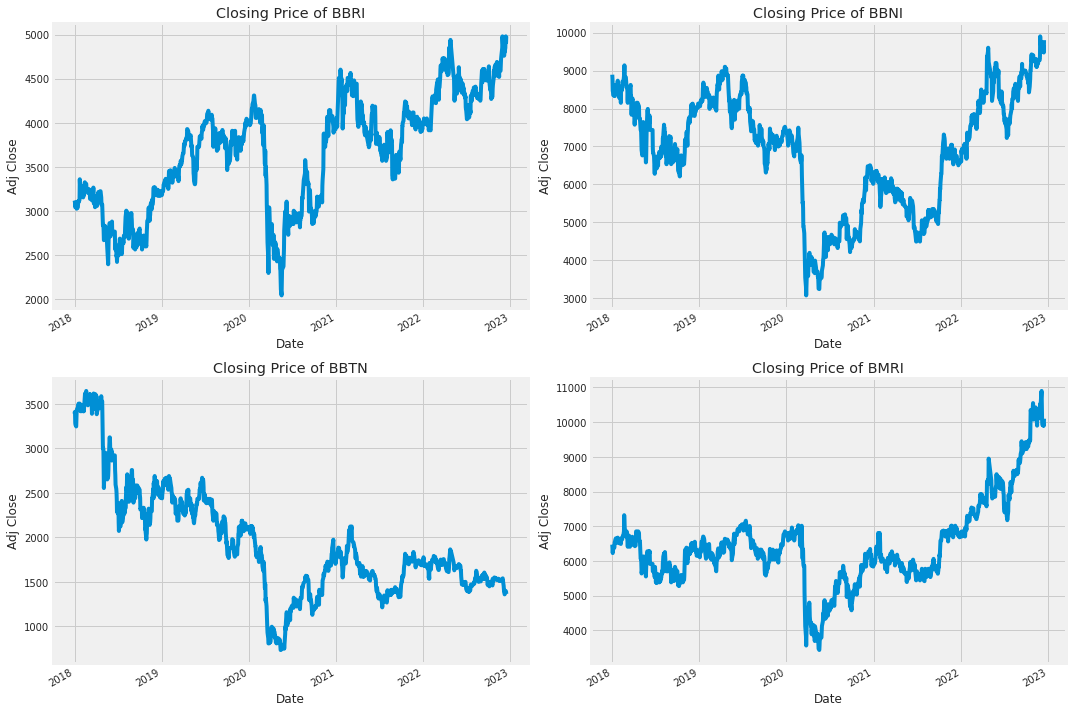

In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel('Date')
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

- Bni : From 2018 to 2022, BBNI stock price movement is still in consolidation (sideways) phase. However, the share price fell in March 2020, then recorded a strong trend with a strong trend until 2022.

- The beginning of 2020 started sideways until the beginning of March, bearish in March due to the reduction of national transactions, then it saw a bullish trend due to a bullish trend until 2022. This bullish trend is due to the placement of state funds by the Minister of Finance to strengthen the financial sector index.

- BTN : Stock prices are likely to experience a bearish trend from 2018 to mid-2020. After that, the stock's movement will enter a consolidation (sideways) phase until 2022.

- MRI : In 2018 to early 2020, BBNI's share price movement was still in the consolidation phase (sideways), but the share price fell in March 2020. The share price continued to rise until the end of 2022.


**Stock price movements decreased for all banks in March 2022. However, until the end of 2022, stock movements continued to increase, except for Bank BTN**

## 2.  What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses

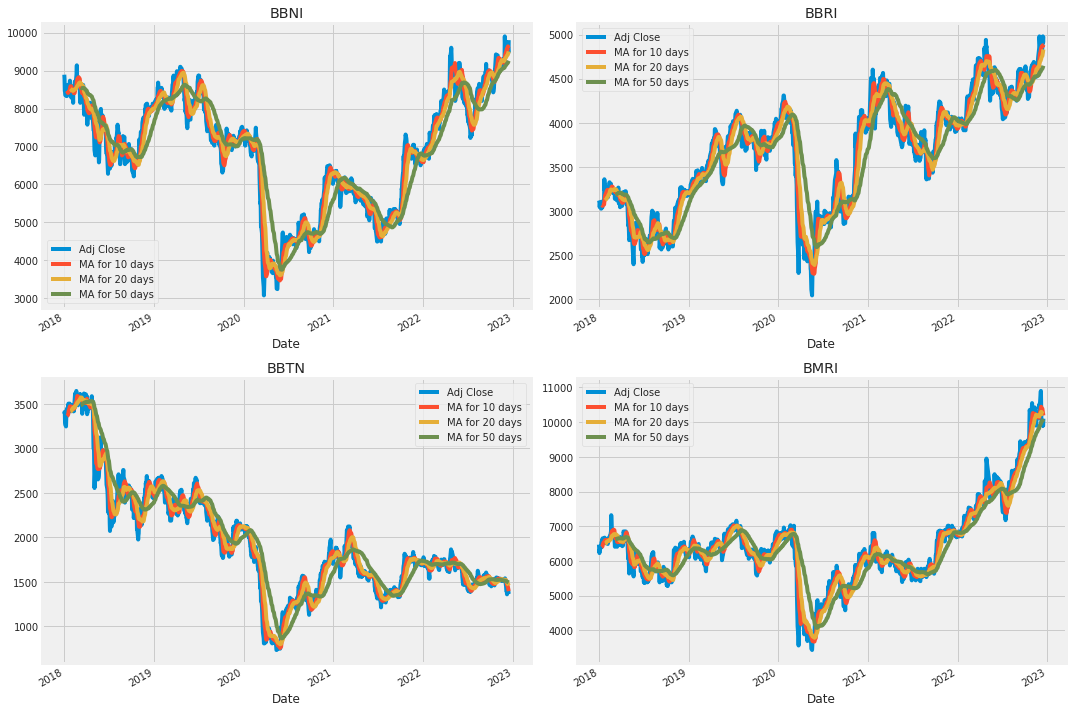

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

BBNI_df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('BBNI')

BBRI_df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('BBRI')

BBTN_df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('BBTN')

BMRI_df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('BMRI')

fig.tight_layout()

We see within the graph that the finest values to degree the moving average are 10 and 20 days since we still capture patterns within the information without commotion.

## 3. What was the daily return of the stock on average?

Presently that we've done a few pattern investigation, let's go ahead and jump a small more profound. We're presently reaching to analyze the hazard of the stock. In arrange to do so we'll have to be take a closer see at the day by day changes of the stock, and not just its absolute value. 

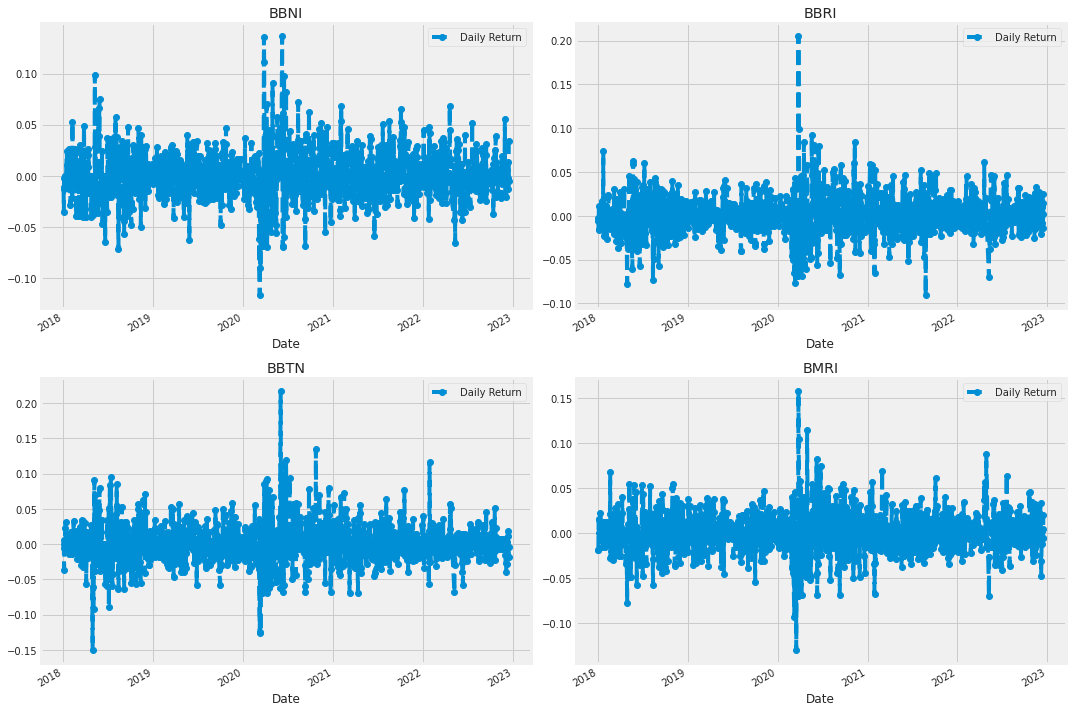

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

BBNI_df['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('BBNI')

BBRI_df['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('BBRI')

BBTN_df['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('BBTN')

BMRI_df['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('BMRI')

fig.tight_layout()

The daily return graph also showing alot of instability by the sharp spike along the time period. Shown within the picture, the every day return dissemination has long overwhelming tail on both sides. Which implies speculators can be exceptionally beneficial or misfortune.

## 4. What is the daily possible loss / profit ?

###  BBNI

In [ ]:
BBNI['Daily_Return'] = BBNI['Close'].pct_change()

In [ ]:
# Creating new dataframe for loss analysis
BBNI_neg = BBNI[BBNI['Daily_Return'] < 0]
BBNI_pos = BBNI[BBNI['Daily_Return'] > 0]

In [ ]:
import scipy.stats

In [ ]:
# Making function for confidence interval calculation with alpha = 0.05
def mean_confidence_interval(BBNI, confidence=0.95):
    n = len(BBNI)
    m, se = np.mean(BBNI), scipy.stats.sem(BBNI)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return (m-h)*100, (m+h)*100

In [ ]:
BBNI_df

,Open,High,Low,Close,Adj Close,Volume,company_name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2018-01-01,9900.0,9900.0,9900.0,9900.0,8890.173828,0.0,BBNI,NaN,NaN,NaN,NaN
2018-01-02,9900.0,10000.0,9675.0,9775.0,8777.924805,12434000.0,BBNI,NaN,NaN,NaN,-0.012626
2018-01-03,9775.0,9800.0,9375.0,9425.0,8463.625000,26893200.0,BBNI,NaN,NaN,NaN,-0.035806
2018-01-04,9350.0,9425.0,9150.0,9400.0,8441.174805,25390100.0,BBNI,NaN,NaN,NaN,-0.002653
2018-01-05,9400.0,9450.0,9250.0,9300.0,8351.375000,23046300.0,BBNI,NaN,NaN,NaN,-0.010638
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-12,9550.0,9650.0,9425.0,9525.0,9525.000000,18345000.0,BBNI,9610.0,9416.25,9196.0,-0.002618
2022-12-13,9600.0,9650.0,9500.0,9650.0,9650.000000,22228800.0,BBNI,9637.5,9442.50,9212.0,0.013123
2022-12-14,9675.0,9750.0,9475.0,9525.0,9525.000000,25656700.0,BBNI,9600.0,9463.75,9225.5,-0.012953


In [ ]:
# Confidence interval with 5% error for loss
mean_confidence_interval(BBNI_neg['Daily_Return'])

(-1.8444414062364163, -1.5866713247491664)

In [ ]:
# Confidence interval with 5% error for profit
mean_confidence_interval(BBNI_pos['Daily_Return'])

(1.7547180536288571, 2.060002248672519)

Using the Confidence Interval, we are 95% beyond any doubt that the normal conceivable loss in a day is between 1.687% to 1.852%. Whereas the normal conceivable profit in a day is between 1.772% to 2.3515%.

### BBRI

In [ ]:
BBRI['Daily_Return'] = BBRI['Close'].pct_change()

In [ ]:
# Creating new dataframe for loss analysis
BBRI_neg = BBRI[BBRI['Daily_Return'] < 0]
BBRI_pos = BBRI[BBRI['Daily_Return'] > 0]

In [ ]:
# Making function for confidence interval calculation with alpha = 0.05
def mean_confidence_interval(BBRI, confidence=0.95):
    n = len(BBRI)
    m, se = np.mean(BBRI), scipy.stats.sem(BBRI)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return (m-h)*100, (m+h)*100

In [ ]:
# Confidence interval with 5% error for loss
mean_confidence_interval(BBRI_neg['Daily_Return'])

(-1.7423539616399661, -1.495228404527294)

In [ ]:
# Confidence interval with 5% error for profit
mean_confidence_interval(BBRI_pos['Daily_Return'])

(1.605795892878988, 1.8958054759832355)

Using the Confidence Interval, we are 95% beyond any doubt that the normal conceivable loss in a day is between 1.495% to 1.742%. Whereas the normal conceivable profit in a day is between 1.6058% to 1.8958%.

###BBTN

In [ ]:
BBTN['Daily_Return'] = BBTN['Close'].pct_change()

In [ ]:
# Creating new dataframe for loss analysis
BBTN_neg = BBTN[BBTN['Daily_Return'] < 0]
BBTN_pos = BBTN[BBTN['Daily_Return'] > 0]

In [ ]:
# Making function for confidence interval calculation with alpha = 0.05
def mean_confidence_interval(BBTN, confidence=0.95):
    n = len(BBTN)
    m, se = np.mean(BBTN), scipy.stats.sem(BBTN)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return (m-h)*100, (m+h)*100

In [ ]:
# Confidence interval with 5% error for loss
mean_confidence_interval(BBTN_neg['Daily_Return'])

(-2.106678376503245, -1.8178413327663594)

In [ ]:
# Confidence interval with 5% error for profit
mean_confidence_interval(BBTN_pos['Daily_Return'])

(2.025610135161463, 2.426988019379595)

Using the Confidence Interval, we are 95% beyond any doubt that the normal conceivable loss in a day is between 1.8178% to 2.1067%. Whereas the normal conceivable profit in a day is between 2.0256% to 2.4269%.

###BMRI

In [ ]:
BMRI['Daily_Return'] = BMRI['Close'].pct_change()

In [ ]:
# Creating new dataframe for loss analysis
BMRI_neg = BMRI[BMRI['Daily_Return'] < 0]
BMRI_pos = BMRI[BMRI['Daily_Return'] > 0]

In [ ]:
# Making function for confidence interval calculation with alpha = 0.05
def mean_confidence_interval(BMRI, confidence=0.95):
    n = len(BMRI)
    m, se = np.mean(BMRI), scipy.stats.sem(BMRI)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return (m-h)*100, (m+h)*100

In [ ]:
# Confidence interval with 5% error for loss
mean_confidence_interval(BMRI_neg['Daily_Return'])

(-1.8397938670038132, -1.5813250570381596)

In [ ]:
# Confidence interval with 5% error for profit
mean_confidence_interval(BMRI_pos['Daily_Return'])

(1.6400862919869406, 1.9130882450963906)

Using the Confidence Interval, we are 95% beyond any doubt that the normal conceivable loss in a day is between 1.5813% to 1.8398%. Whereas the normal conceivable profit in a day is between 1.64% to 1.9131%.

## Comparison Between 4 Banks

In [ ]:
# Create Mothvise
monthvise= df.groupby(df['date'].dt.strftime('%B'))[['bni','bri', 'btn', 'mri']].mean()
monthvise.head()

,bni,bri,btn,mri
date,,,,
April,7205.000000,4460.000000,1674.625000,7037.500000
August,6842.023810,4074.040341,1457.500000,7245.833333
December,7383.928571,4285.714286,1673.750000,7866.964286
February,6890.540541,4507.567568,1809.864865,7060.810811
January,6694.512195,4354.146341,1746.097561,7060.365854


In [ ]:
# Create figure
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['bni'],
    name='BNI',
    marker_color='crimson'))

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['bri'],
    name='BRI',
    marker_color='lightsalmon'))

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['btn'],
    name='BTN',
    marker_color='aqua'))

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['mri'],
    name='MANDIRI',
    marker_color='slategrey'))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Comparison between 4 Banks')
fig.show()

## Comparison of Adj Close Between 4 Banks

In [ ]:
# Create Chart
names = cycle(['BNI','BRI','BTN','MANDIRI'])

fig = px.line(df, x=df.date, y=[df['bni'], df['bri'], df['btn'], df['mri']],
    labels={'date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Visual Adj Close', font_size=15, font_color='black',legend_title_text='Nama Bank')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# V. Data Preprocessing, Model Definition, Model Prediction, Model Evaluation

In [ ]:
# Make Dataset of 4 banks separately
bni = df[['date', 'bni']]
bri = df[['date', 'bri']]
btn = df[['date', 'btn']]
mri = df[['date', 'mri']]

## BNI

**Scaling**

In [ ]:
del bni['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(bni).reshape(-1,1))
print(closedf.shape)

(477, 1)


**Split Train-Set & Test-Set**

In [ ]:
training_size=int(len(closedf)*0.80)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (381, 1)
test_data:  (96, 1)


>Splitting 20% of data for test and 80% for test-train dataset so that the 'machine' can 'learn' to make predictions.

Create new dataset according to requirement of time-series prediction

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (365, 15)
y_train:  (365,)
X_test:  (80, 15)
y_test (80,)


**Model Definition**

In this model, we use LSTM + GRU algorithm 

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (365, 15, 1)
X_test:  (80, 15, 1)


In [ ]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 gru (GRU)                   (None, 15, 32)            6336      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 25,377
Trainable params: 25,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Training model
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=5,verbose=1)

Epoch 1/200
73/73 [==============================] - 12s 26ms/step - loss: 0.0220 - val_loss: 0.0164
Epoch 2/200
73/73 [==============================] - 1s 7ms/step - loss: 0.0057 - val_loss: 0.0025
Epoch 3/200
73/73 [==============================] - 1s 8ms/step - loss: 0.0057 - val_loss: 0.0047
Epoch 4/200
73/73 [==============================] - 1s 7ms/step - loss: 0.0052 - val_loss: 0.0066
Epoch 5/200
73/73 [==============================] - 1s 7ms/step - loss: 0.0045 - val_loss: 0.0048
Epoch 6/200
73/73 [==============================] - 1s 7ms/step - loss: 0.0038 - val_loss: 0.0117
Epoch 7/200
73/73 [==============================] - 1s 7ms/step - loss: 0.0037 - val_loss: 0.0133
Epoch 8/200
73/73 [==============================] - 1s 7ms/step - loss: 0.0038 - val_loss: 0.0077
Epoch 9/200
73/73 [==============================] - 1s 7ms/step - loss: 0.0038 - val_loss: 0.0024
Epoch 10/200
73/73 [==============================] - 1s 7ms/step - loss: 0.0035 - val_loss: 0.0014
Epoch 1

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

3/3 [==============================] - 0s 7ms/step


((365, 1), (80, 1))

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  144.41081011592135
Train data MSE:  20854.48207833669
Test data MAE:  108.84757063356165
-------------------------------------------------------------------------------------
Test data RMSE:  229.38600390352616
Test data MSE:  52617.93878682852
Test data MAE:  196.56307373046874


Mean absolute error for BNI bank is RP.196,00.- , that means the error from the predicted result is not too big and it won't has significcant loss.

In [ ]:
# Variances Regression
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9872947113854057
Test data explained variance regression score: 0.8717859355007288


In [ ]:
# R2 Score
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9865195544537061
Test data R2 score: 0.864724964716185


In [ ]:
# Shift train predictions for Plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# Shift test predictions for Plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

# Plot Comparison Between Original Close Price vs Predicted Close Price
plotdf = pd.DataFrame({'date': df['date'],
                       'original_close': df['bni'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparison Between Original Close Price vs Predicted Close Price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (477, 1)
Test predicted data:  (477, 1)


In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [ ]:
# Plotting Comparison Between Last 15 Days vs Next 10 Days
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Comparison Between Last 15 Days vs Next 10 Days',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
# Plotting whole closing stock price with prediction
lstmgrudf=closedf.tolist()
lstmgrudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmgrudf=scaler.inverse_transform(lstmgrudf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmgrudf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Closing Stock Price with Prediction',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## BRI

**Scaling**

In [ ]:
del bri['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(bri).reshape(-1,1))
print(closedf.shape)

(477, 1)


**Split Train-Set & Test-Set**

In [ ]:
training_size=int(len(closedf)*0.80)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (381, 1)
test_data:  (96, 1)


>Create new dataset according to requirement of time-series prediction

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (365, 15)
y_train:  (365,)
X_test:  (80, 15)
y_test (80,)


**Model Definition**

In this model, we use LSTM + GRU algorithm 

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (365, 15, 1)
X_test:  (80, 15, 1)


In [ ]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 gru (GRU)                   (None, 15, 32)            6336      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 25,377
Trainable params: 25,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=5,verbose=1)

Epoch 1/200
73/73 [==============================] - 6s 24ms/step - loss: 0.0417 - val_loss: 0.0104
Epoch 2/200
73/73 [==============================] - 1s 7ms/step - loss: 0.0130 - val_loss: 0.0141
Epoch 3/200
73/73 [==============================] - 1s 7ms/step - loss: 0.0121 - val_loss: 0.0087
Epoch 4/200
73/73 [==============================] - 1s 7ms/step - loss: 0.0117 - val_loss: 0.0120
Epoch 5/200
73/73 [==============================] - 1s 11ms/step - loss: 0.0108 - val_loss: 0.0162
Epoch 6/200
73/73 [==============================] - 1s 13ms/step - loss: 0.0097 - val_loss: 0.0101
Epoch 7/200
73/73 [==============================] - 1s 12ms/step - loss: 0.0087 - val_loss: 0.0058
Epoch 8/200
73/73 [==============================] - 1s 8ms/step - loss: 0.0091 - val_loss: 0.0074
Epoch 9/200
73/73 [==============================] - 1s 14ms/step - loss: 0.0087 - val_loss: 0.0050
Epoch 10/200
73/73 [==============================] - 1s 11ms/step - loss: 0.0060 - val_loss: 0.0033
Epo

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

3/3 [==============================] - 0s 5ms/step


((365, 1), (80, 1))

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  72.41975042775388
Train data MSE:  5244.62025201816
Test data MAE:  53.86574539880137
-------------------------------------------------------------------------------------
Test data RMSE:  66.76595097066526
Test data MSE:  4457.692209017277
Test data MAE:  53.539599609375


Mean absolute error for BNI bank is RP.53,00.- , that means the error from the predicted result is not too big and it won't has significcant loss.

In [ ]:
# Variance Regression Score
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9485911592191326
Test data explained variance regression score: 0.8459905898530992


In [ ]:
# R2 Score
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9479223382414966
Test data R2 score: 0.8443318165995402


In [ ]:
# Shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# Shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

# Plot Comparison Between Original Close Price vs Predicted Close Price
plotdf = pd.DataFrame({'date': df['date'],
                       'original_close': df['bri'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparison Between Original Close Price vs Predicted Close Price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (477, 1)
Test predicted data:  (477, 1)


In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

# Plot Comparison Between Last 15 Days vs Next 10 Days
new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Comparison Between Last 15 Days vs Next 10 Days',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
lstmgrudf=closedf.tolist()
lstmgrudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmgrudf=scaler.inverse_transform(lstmgrudf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

# Plotting whole closing stock price with prediction
fig = px.line(lstmgrudf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Closing Stock Price with Prediction',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## BTN

**Scaling**

In [ ]:
del btn['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(btn).reshape(-1,1))
print(closedf.shape)

(477, 1)


**Split Train-Set & Test-Set**

In [ ]:
training_size=int(len(closedf)*0.80)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (381, 1)
test_data:  (96, 1)


>Create new dataset according to requirement of time-series prediction

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (365, 15)
y_train:  (365,)
X_test:  (80, 15)
y_test (80,)


**Model Definition**

In this model, we use LSTM + GRU algorithm 

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (365, 15, 1)
X_test:  (80, 15, 1)


In [ ]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 gru (GRU)                   (None, 15, 32)            6336      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 25,377
Trainable params: 25,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=5,verbose=1)

Epoch 1/200
73/73 [==============================] - 8s 54ms/step - loss: 0.0233 - val_loss: 0.0018
Epoch 2/200
73/73 [==============================] - 1s 11ms/step - loss: 0.0107 - val_loss: 0.0033
Epoch 3/200
73/73 [==============================] - 1s 8ms/step - loss: 0.0100 - val_loss: 0.0017
Epoch 4/200
73/73 [==============================] - 1s 8ms/step - loss: 0.0077 - val_loss: 0.0022
Epoch 5/200
73/73 [==============================] - 1s 7ms/step - loss: 0.0061 - val_loss: 0.0014
Epoch 6/200
73/73 [==============================] - 1s 9ms/step - loss: 0.0052 - val_loss: 0.0027
Epoch 7/200
73/73 [==============================] - 1s 12ms/step - loss: 0.0052 - val_loss: 0.0023
Epoch 8/200
73/73 [==============================] - 1s 11ms/step - loss: 0.0051 - val_loss: 0.0016
Epoch 9/200
73/73 [==============================] - 1s 9ms/step - loss: 0.0042 - val_loss: 0.0018
Epoch 10/200
73/73 [==============================] - 1s 12ms/step - loss: 0.0034 - val_loss: 0.0014
Epoc

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

3/3 [==============================] - 0s 5ms/step


((365, 1), (80, 1))

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  34.89726820983103
Train data MSE:  1217.8193285088837
Test data MAE:  24.978451412671234
-------------------------------------------------------------------------------------
Test data RMSE:  21.68280141862822
Test data MSE:  470.1438773596659
Test data MAE:  15.131593322753906


Mean absolute error for BNI bank is RP.470,00.- , that means the error from the predicted result is not too big and it won't has significcant loss.

In [ ]:
# Variance Regression
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9635886011822612
Test data explained variance regression score: 0.639875783323294


In [ ]:
# R2 Score
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9632841241913914
Test data R2 score: 0.6396286226598165


In [ ]:
# Shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# Shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

# Plot Comparison Between Original Close Price vs Predicted Close Price
plotdf = pd.DataFrame({'date': df['date'],
                       'original_close': df['btn'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparison Between Original Close Price vs Predicted Close Price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (477, 1)
Test predicted data:  (477, 1)


In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

# Plot Comparison Between Last 15 Days vs Next 10 Days
new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Comparison Between Last 15 Days vs Next 10 Days',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
lstmgrudf=closedf.tolist()
lstmgrudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmgrudf=scaler.inverse_transform(lstmgrudf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

# Plotting whole closing stock price with prediction
fig = px.line(lstmgrudf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Closing Stock Price with Prediction',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## MRI

**Scaling**

In [ ]:
del mri['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(mri).reshape(-1,1))
print(closedf.shape)

(477, 1)


**Split Train-Set & Test-Set**

In [ ]:
training_size=int(len(closedf)*0.80)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (381, 1)
test_data:  (96, 1)


>Splitting 20% of data for test and 80% for test-train dataset so that the 'machine' can 'learn' to make predictions.

Create new dataset according to requirement of time-series prediction

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (365, 15)
y_train:  (365,)
X_test:  (80, 15)
y_test (80,)


**Model Definition**

In this model, we use LSTM + GRU algorithm 

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (365, 15, 1)
X_test:  (80, 15, 1)


In [ ]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 gru (GRU)                   (None, 15, 32)            6336      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 25,377
Trainable params: 25,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=5,verbose=1)

Epoch 1/200
73/73 [==============================] - 6s 24ms/step - loss: 0.0112 - val_loss: 0.0070
Epoch 2/200
73/73 [==============================] - 1s 7ms/step - loss: 0.0029 - val_loss: 0.0020
Epoch 3/200
73/73 [==============================] - 1s 7ms/step - loss: 0.0028 - val_loss: 0.0144
Epoch 4/200
73/73 [==============================] - 1s 8ms/step - loss: 0.0024 - val_loss: 0.0054
Epoch 5/200
73/73 [==============================] - 1s 7ms/step - loss: 0.0025 - val_loss: 0.0043
Epoch 6/200
73/73 [==============================] - 1s 8ms/step - loss: 0.0020 - val_loss: 0.0077
Epoch 7/200
73/73 [==============================] - 1s 8ms/step - loss: 0.0018 - val_loss: 0.0041
Epoch 8/200
73/73 [==============================] - 1s 8ms/step - loss: 0.0017 - val_loss: 0.0071
Epoch 9/200
73/73 [==============================] - 1s 7ms/step - loss: 0.0016 - val_loss: 0.0069
Epoch 10/200
73/73 [==============================] - 1s 8ms/step - loss: 0.0013 - val_loss: 0.0093
Epoch 11

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

3/3 [==============================] - 0s 5ms/step


((365, 1), (80, 1))

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  119.6702171661501
Train data MSE:  14320.960876593525
Test data MAE:  88.12717653039384
-------------------------------------------------------------------------------------
Test data RMSE:  679.3755370142954
Test data MSE:  461551.1202934623
Test data MAE:  583.6366333007812


Mean absolute error for BNI bank is RP.88,00.- , that means the error from the predicted result is not too big and it won't has significcant loss.

In [ ]:
# Variance Regression
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9773112822237318
Test data explained variance regression score: 0.7059260910523486


In [ ]:
# R2 Score
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9773071004348913
Test data R2 score: -0.12248441103860253


In [ ]:
# Shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# Shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

# Plot Comparison Between Original Close Price vs Predicted Close Price
plotdf = pd.DataFrame({'date': df['date'],
                       'original_close': df['mri'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparison Between Original Close Price vs Predicted Close Price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (477, 1)
Test predicted data:  (477, 1)


In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

# Plot Comparison Between Last 15 Days vs Next 10 Days
new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Comparison Between Last 15 Days vs Next 10 Days',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
lstmgrudf=closedf.tolist()
lstmgrudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmgrudf=scaler.inverse_transform(lstmgrudf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

# Plotting whole closing stock price with prediction
fig = px.line(lstmgrudf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Closing Stock Price with Prediction',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# Conclusion

Based on Exploratory Data Analysis that has been conducted, we can gain some insights.

- Stock price movements decreased for all banks in March 2022. However, until the end of 2022, stock movements continued to increase, except for Bank BTN
- The best times to measure moving averages are 10 and 20 days
- The daily return distribution has long heavy tail on both sides. Which means investors can be very profitable or loss
- To predict the stock price of bank, we built a model with LSTM and GRU method.  The results shown,  the model also good to predict the stock of BBNI, BBRI, BBTN, but not to good to predict the stock price of BMRI.